In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
from citipy import citipy
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=384d5d397f66f3a19e54bba6638b951d


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
except:
    print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | geraldton
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | beringovskiy
Processing Record 4 of Set 1 | constitucion
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | killybegs
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | hagere hiywet
Processing Record 10 of Set 1 | bargal
Processing Record 11 of Set 1 | eureka
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | fare
Processing Record 14 of Set 1 | baltasi
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | magadan
Processing Record 18 of Set 1 | nishihara
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | toliary
Processing Record 21 of Set 1 | taolanaro
Processing Record 22 of Set 1 | sentyabrskiy
Processing Record 23 of Set 1 | pestra

Processing Record 1 of Set 5 | ondjiva
Processing Record 2 of Set 5 | elko
Processing Record 3 of Set 5 | tocopilla
Processing Record 4 of Set 5 | garissa
Processing Record 5 of Set 5 | iwanai
Processing Record 6 of Set 5 | hofn
Processing Record 7 of Set 5 | clyde river
Processing Record 8 of Set 5 | burnie
Processing Record 9 of Set 5 | silver city
Processing Record 10 of Set 5 | kazalinsk
Processing Record 11 of Set 5 | sorland
Processing Record 12 of Set 5 | attawapiskat
Processing Record 13 of Set 5 | vestbygda
Processing Record 14 of Set 5 | pisco
Processing Record 15 of Set 5 | wattegama
Processing Record 16 of Set 5 | nikolskoye
Processing Record 17 of Set 5 | samalaeulu
Processing Record 18 of Set 5 | russell
Processing Record 19 of Set 5 | morondava
Processing Record 20 of Set 5 | vila velha
Processing Record 21 of Set 5 | grand forks
Processing Record 22 of Set 5 | natal
Processing Record 23 of Set 5 | codrington
Processing Record 24 of Set 5 | poso
Processing Record 25 of S

Processing Record 1 of Set 9 | iracoubo
Processing Record 2 of Set 9 | opuwo
Processing Record 3 of Set 9 | pecos
Processing Record 4 of Set 9 | sitka
Processing Record 5 of Set 9 | kurchum
Processing Record 6 of Set 9 | serenje
Processing Record 7 of Set 9 | suez
Processing Record 8 of Set 9 | jalu
Processing Record 9 of Set 9 | hami
Processing Record 10 of Set 9 | bashtanka
Processing Record 11 of Set 9 | manga
Processing Record 12 of Set 9 | tura
Processing Record 13 of Set 9 | eyl
Processing Record 14 of Set 9 | jalalabad
Processing Record 15 of Set 9 | baghdad
Processing Record 16 of Set 9 | songea
Processing Record 17 of Set 9 | santo antonio de jesus
Processing Record 18 of Set 9 | ajdabiya
Processing Record 19 of Set 9 | rosarito
Processing Record 20 of Set 9 | geylegphug
Processing Record 21 of Set 9 | senno
Processing Record 22 of Set 9 | jumla
Processing Record 23 of Set 9 | calvinia
Processing Record 24 of Set 9 | gushikawa
Processing Record 25 of Set 9 | neiafu
Processing 

Processing Record 1 of Set 13 | ishinomaki
Processing Record 2 of Set 13 | jacareacanga
Processing Record 3 of Set 13 | bhawanipatna
Processing Record 4 of Set 13 | lethem
Processing Record 5 of Set 13 | otradnoye
Processing Record 6 of Set 13 | metapan
Processing Record 7 of Set 13 | saint-pierre
Processing Record 8 of Set 13 | puerto escondido
Processing Record 9 of Set 13 | fort nelson
Processing Record 10 of Set 13 | namatanai
Processing Record 11 of Set 13 | rolim de moura
Processing Record 12 of Set 13 | santiago de cao
Processing Record 13 of Set 13 | katobu
Processing Record 14 of Set 13 | padang
Processing Record 15 of Set 13 | chistogorskiy
Processing Record 16 of Set 13 | kisangani
Processing Record 17 of Set 13 | joshimath
Processing Record 18 of Set 13 | chifeng
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
len(city_data)

1

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chifeng,42.2683,118.9636,35.56,33,0,5.39,CN,2021-12-10 04:00:23


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

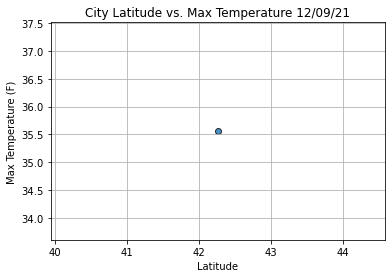

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

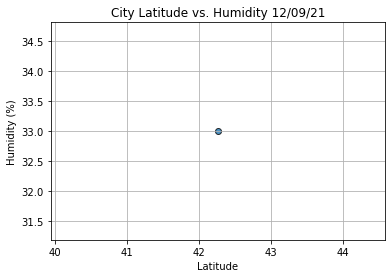

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()